# Домашнее задание №4
## Задание №1

1) Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

In [27]:
g =  open("HarryPotter", "r", encoding="utf-8")
potter = g.read() #читаем файл и записываем текст из файла в переменную
g.close()

2) Очистите текст от пунктуации.  
 


In [28]:
# очищаем текст от пунктуации с помощью генератора списков
no_punct = [word.strip("!?«»'—'.,-") for word in potter.split()]


Приведите его к нижнему регистру

In [29]:
potter2 = []
for word in no_punct: #проходимся циклом по списку и приводим все буквы к нижнему регистру
    if word.isalpha():
        potter2.append(word.lower())

Лемматизируйте и запишите в новый файл.

In [31]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag 

#лемматизируем текст
wnl = WordNetLemmatizer()
l = [wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wnl.lemmatize(i) for i,j in pos_tag(word_tokenize(lemmas))] 
#нашел код для лемматизации в интернете, без него nltk абсолютно ничего не лемматизировал
#хотя 'was' все равно меняет на 'wa'

l[:30]

['mr',
 'and',
 'mr',
 'dursley',
 'of',
 'number',
 'four',
 'privet',
 'drive',
 'be',
 'proud',
 'to',
 'say',
 'that',
 'they',
 'be',
 'perfectly',
 'normal',
 'thank',
 'you',
 'very',
 'much',
 'they',
 'be',
 'the',
 'last',
 'people',
 'expect',
 'to',
 'be']

In [40]:
#соединяем через пробел текст в строку
lemmas = ' '.join(l) 

#создаем функцию, которая записывает лемм. текст в новый файл
with open('lemmas.txt', 'w', encoding='utf-8') as f: 
    for d in lemmas:
        f.write(d)
    f.close()

Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном частотном словаре, а по оси Y - относительная частота (не ipm, а просто абсолютная частота, разделенная на количество слов в тексте).

In [41]:
#высчитываем x - ранг (порядковый номер) слова в отсортированном частотном словаре
from collections import Counter 

#с помощью counts считаем частотность слов в тексте
counts = Counter(lemmas.split())
counts_dict = dict(counts) #делаем из массива словарь
# сортируем словарь
sorted_counts = sorted(counts_dict.items(), key=lambda x: x[1], reverse=True)
bb = dict(sorted_counts) #делаем из массива словарь
#меняем значение в словаре на порядковый номер
bb1 = {key: rank for rank, key in enumerate(sorted(bb, key=bb.get), 1)}  

In [42]:
#считаем y -  относительная частота (не ipm, а просто абсолютная частота, разделенная на количество слов в тексте)

quant = len(lemmas.split()) #счиатем кол-во слов в тексте
y = {} #создаем пустой словарь 

#создаем цикл который будет записывать в словарь новые ключи и значения
for word, count in counts_dict.items(): #items достает из словаря все пары ключей со значением
    chastota = count/quant #рассчитываем относительную частоту ipm  для этого делим значения словаря на кол-во слов в тексте
    y[word] = chastota #ключ - слово, значение - относительная частота

# сортируем словарь
sorted_y = sorted(y.items(), key=lambda x: x[1], reverse=True)
dd = dict(sorted_y) #делаем из массива словарь


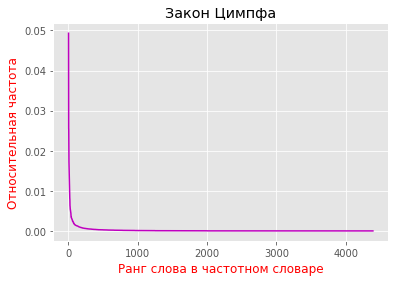

In [43]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot

X = list(bb1.values()) # достаем из словаря только значения (порядковый номер) и делаем из этого массив
Y = list(dd.values()) #достаем из словаря только значения (относительная частота) и делаем из этого массив
         
plt.plot(X,Y, color='m'), # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title("Закон Цимпфа")
plt.xlabel("Ранг слова в частотном словаре", color='r')
plt.ylabel("Относительная частота", color='r')
plt.show()

3) Очистите текст от стоп-слов.

In [44]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw = stopwords.words('english') #заносим в переменную английские стоп-слова из библиотеки

#очищаем текст от стоп-слов
no_stop_words = [w for w in word_tokenize(lemmas) if w not in sw]

Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [45]:
#с помощью counts считаем частотность слов в тексте
counts1 = Counter(no_stop_words)
counts_dict1 = dict(counts1) #делаем из массива словарь
# сортируем словарь
sorted_counts1 = sorted(counts_dict1.items(), key=lambda x: x[1], reverse=True)
sorted_counts2 = dict(sorted_counts1) #словарь делаем из массива
z = sorted_counts2.keys()
z1 = list(z) #массив слов 
r = sorted_counts2.values()
r1 = list(r) #массив кол-ва употрблений слов


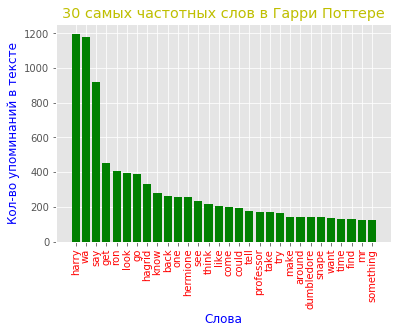

In [46]:
X = [i for i in range(0,30)] #берем только первые 30 слов
Y = r1[:30] #первые 30 значений в словаре

plt.bar(X, Y, color='g')
plt.xticks(X, z1, color='r', rotation=90) #делаем подписи по оси x - слова
plt.title("30 самых частотных слов в Гарри Поттере", color='y')
plt.xlabel("Слова", color='b')
plt.ylabel("Кол-во упоминаний в тексте", color='b')
plt.show()